# CNN HelloWorld:使用CNN-Classifier处理CIFAR10

更新时间：2019/3/28（进度：读取CIFAR10数据集）
       2019/4/23（进度：参考pytorch-tutorials完成）

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

## 读取数据并可视化显示

In [2]:
# def unpickle(file):
#     import pickle
#     fo = open(file, 'rb')
#     Dict = pickle.load(fo,encoding='iso-8859-1')
#     fo.close()
#     return Dict

# # 读取训练集数据
# file_batch1 = 'E:/Programming/Dataset/CIFAR10/cifar-10-batches-py/data_batch_1'
# file_batch2 = 'E:/Programming/Dataset/CIFAR10/cifar-10-batches-py/data_batch_2'
# file_batch3 = 'E:/Programming/Dataset/CIFAR10/cifar-10-batches-py/data_batch_3'
# file_batch4 = 'E:/Programming/Dataset/CIFAR10/cifar-10-batches-py/data_batch_4'
# file_batch5 = 'E:/Programming/Dataset/CIFAR10/cifar-10-batches-py/data_batch_5'
# train_batch_files = [file_batch1,file_batch2,file_batch3,file_batch4,file_batch5]
# train_batches = []
# for file in train_batch_files:
#     dict_train_batch = unpickle(file)
#     data_train_batch = dict_train_batch.get('data')
#     labels =  dict_train_batch.get('labels')
#     train_batches.append([data_train_batch,labels])
# train_data = np.concatenate([x[0] for x in train_batches])
# train_labels = np.concatenate([x[1] for x in train_batches])

# # 读取测试集数据
# test_batch = 'E:/Programming/Dataset/CIFAR10/cifar-10-batches-py/test_batch'
# dict_test_batch = unpickle(test_batch)
# test_data = dict_test_batch.get('data')
# test_labels = dict_test_batch.get('labels')

# 图像归一化处理
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])#(mean1,mean2,mean3),(std1,std2,std3)

trainset = torchvision.datasets.CIFAR10(root='E:/Programming/Dataset/CIFAR10/', train=True,
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='E:/Programming/Dataset/CIFAR10/', train=False,
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)
    
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

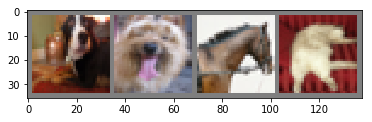

  dog   dog horse   cat


In [4]:
import matplotlib.pyplot as plt

# img_test = train_data[0,:]
# plt.figure()
# plt.imshow(img_test.reshape(3, 32, 32).transpose(1,2,0).astype("uint8"))
# plt.show()
# label_test = train_batches[0][1]
# print(classes[label_test[0]])

# print(train_data.shape)
# print(test_data.shape)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## PCA降维处理

In [4]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 100, svd_solver = "full")
# train_data_pca = pca.fit_transform(train_data)
# test_data_pca = pca.transform(test_data)
# print(train_data_pca.shape,test_data_pca.shape)

## CNN模型定义

网络前馈定义：

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        super(Net,self).__init__()
        self.pool = nn.MaxPool2d(2,2)
        # input_channals,output_channals,kernal_size
        self.conv1 = nn.Conv2d(3,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

使用Cross-Entropy loss/SGD学习：

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001, momentum=0.9)

## 训练模型

In [7]:
import time
start_time = time.time()
for epoch in range(5):
    running_loss = 0.0
    for i,data in enumerate(trainloader,0):
        inputs,labels=data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i%2000 == 1999:
            print('[%d,%5d] loss:%.3f'%
                 (epoch+1,i+1,running_loss/2000))
            running_loss = 0.0
print('Finished Training in %.3f s'%(time.time()-start_time))


[1, 2000] loss:2.197
[1, 4000] loss:1.867
[1, 6000] loss:1.666
[1, 8000] loss:1.553
[1,10000] loss:1.495
[1,12000] loss:1.443
[2, 2000] loss:1.382
[2, 4000] loss:1.351
[2, 6000] loss:1.322
[2, 8000] loss:1.304
[2,10000] loss:1.283
[2,12000] loss:1.267
[3, 2000] loss:1.193
[3, 4000] loss:1.195
[3, 6000] loss:1.177
[3, 8000] loss:1.192
[3,10000] loss:1.148
[3,12000] loss:1.182
[4, 2000] loss:1.069
[4, 4000] loss:1.071
[4, 6000] loss:1.094
[4, 8000] loss:1.087
[4,10000] loss:1.090
[4,12000] loss:1.096
[5, 2000] loss:1.000
[5, 4000] loss:1.020
[5, 6000] loss:0.999
[5, 8000] loss:1.020
[5,10000] loss:1.021
[5,12000] loss:1.021
Finished Training in 346.384 s


## 测试模型

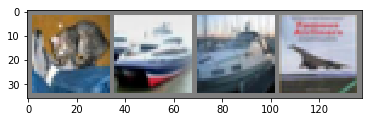

GroundTruth:    cat  ship  ship plane


In [8]:
dataiter = iter(testloader)
images,labels = dataiter.next()
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [9]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat truck  ship  ship


In [10]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 59 %


In [11]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 54 %
Accuracy of   car : 52 %
Accuracy of  bird : 58 %
Accuracy of   cat : 43 %
Accuracy of  deer : 54 %
Accuracy of   dog : 44 %
Accuracy of  frog : 80 %
Accuracy of horse : 66 %
Accuracy of  ship : 68 %
Accuracy of truck : 77 %
